Most common mode of transport taken to university
 number of journeys taken each week
Distribution of journey time to university each week

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


# Reading the data

In [4]:
df = pd.read_csv('/Users/goundosidibe/Downloads/topic4-descriptive-stats1/transport-survey.csv', 
                 index_col = 0)


#assigning the index column and the correct data types
df['gender' ]= df['gender'].astype('category')
df['transport' ]= df['transport'].astype('category')

enjoyment_ordered = ['strongly disagree','disagree','neutral','agree','strongly agree']

df['enjoyment' ]= df['enjoyment'].astype(pd.CategoricalDtype(ordered=True, categories = enjoyment_ordered))

df.head()

,gender,transport,num_journeys,journey_time,enjoyment
0,male,bus,1,23.0,agree
1,male,bus,3,19.0,agree
2,male,bus,2,19.0,disagree
3,female,bus,5,19.0,agree
4,female,bus,4,25.0,disagree


In [6]:
df.shape

(200, 5)

In [7]:
# Check dtype
df['enjoyment'].dtype

CategoricalDtype(categories=['strongly disagree', 'disagree', 'neutral', 'agree',
                  'strongly agree'],
                 ordered=True)

# Missing values

In [8]:
# summarising the number of missing values for each variable
na_summary = df.isna().sum()
na_summary

gender          8
transport       0
num_journeys    0
journey_time    0
enjoyment       0
dtype: int64

# Summary tables

In [9]:
# a summary table of the categorical variables in this DataFrame
cat_summary = df.describe(include=['category'])
cat_summary

,gender,transport,enjoyment
count,192,200,200
unique,4,4,5
top,female,train,neutral
freq,102,85,64


In [10]:
# a summary table of the numerical variables in this DataFrame

num_summary = np.round(df.describe(), 2)
num_summary

,num_journeys,journey_time
count,200.00,200.00
mean,3.21,28.12
std,1.38,12.87
min,1.00,6.00
25%,2.00,17.00
50%,3.50,25.00
75%,4.00,39.00
max,5.00,57.00


# Visualising data

## Gender

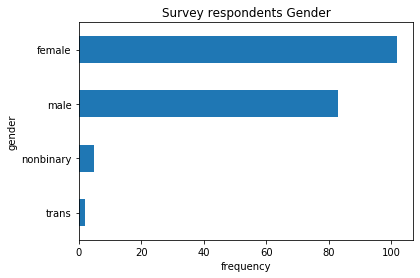

In [11]:
# horizontal bar chart of gender frequency counts

def plot_gender_barh():
   
    a = df['gender'].value_counts()
    ax = a.plot.barh()
    ax.invert_yaxis()
    ax.set_title("Survey respondents Gender")
    ax.set_ylabel("gender");
    ax.set_xlabel("frequency");



    return ax



gender_barh_ax = plot_gender_barh()
plt.show()

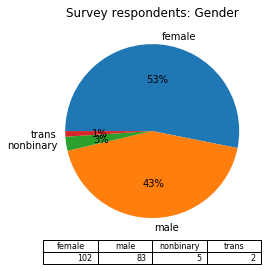

In [12]:
def plot_gender_pie():
    # YOUR CODE HERE
    
    a = df['gender'].value_counts()
    ax = a.plot.pie(autopct='%1.0f%%',
                                 startangle=180,
                                 counterclock=False,
                                 label='',
                                 title='Survey respondents: Gender',
                                 table=True)



plot_gender_pie()
plt.show()


## Transport

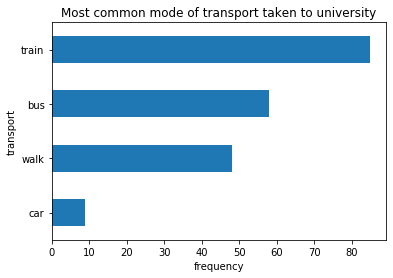

In [13]:
# Most common mode of transport taken to university

def plot_transport_barh():
   
    a = df['transport'].value_counts()
    ax = a.plot.barh()
    ax.invert_yaxis()
    ax.set_title("Most common mode of transport taken to university")
    ax.set_ylabel("transport");
    ax.set_xlabel("frequency");

    return ax


transport_barh_ax = plot_transport_barh()
plt.show()

## Number of journeys

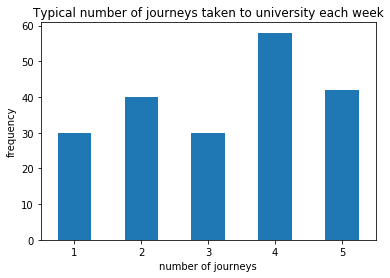

In [14]:
def plot_num_journeys_bar():


    a = df['num_journeys'].value_counts(sort=False)
    ax = a.plot.bar(rot=0)
    ax.set_ylabel("frequency")
    ax.set_xlabel("number of journeys")
    ax.set_title("Typical number of journeys taken to university each week")


    return ax



num_journeys_bar_ax = plot_num_journeys_bar()
plt.show()

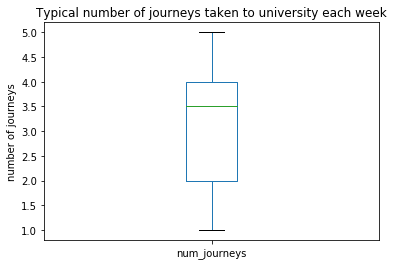

In [15]:
def plot_num_journeys_box():


    ax = df['num_journeys'].plot.box()
    ax.set_title('Typical number of journeys taken to university each week')
    ax.set_ylabel('number of journeys') 

    return ax


num_journeys_box_ax = plot_num_journeys_box()
plt.show()

## Journey time

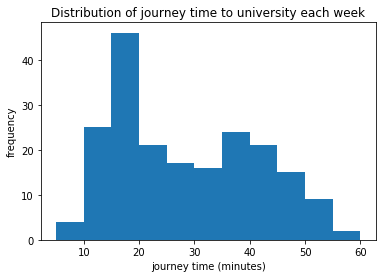

In [16]:
def plot_journey_time_hist():

        bin_size = 5
        start = round(df['journey_time'].min() / bin_size) * bin_size 
        end = df['journey_time'].max() + bin_size
        bins = np.arange(start, end, bin_size)
        ax = df['journey_time'].plot.hist(bins=bins)
        ax.set_title('Distribution of journey time to university each week')
        ax.set_ylabel('frequency')
        ax.set_xlabel('journey time (minutes)')
        mode = pd.cut(df['journey_time'], bins).mode()[0] 




journey_time_hist_ax = plot_journey_time_hist()
plt.show()
